# Zomato data analysis 

# Step 1: Import necessary python libraries.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create the data frame(df).

In [2]:
df = pd.read_csv("Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Step 3: Let's convert the data type of the "rate" column to float and remove the denominator.

In [4]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] =df['rate'].apply(handleRate)
print(df.head())
      

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


# Step 4: Summary of the dataframe(df)

In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# There is no Null value in  dataframe(df).

# 1) What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'Type of Restaurant')

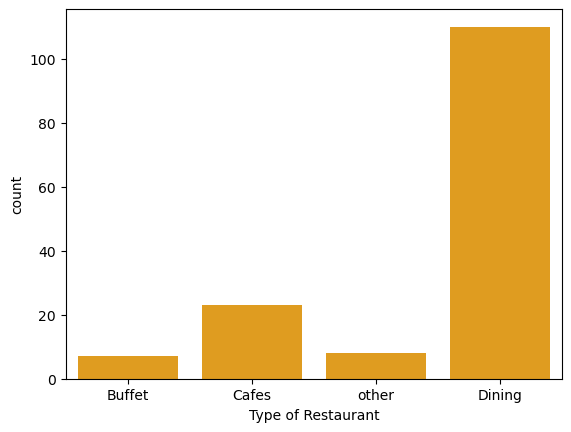

In [8]:
sns.countplot(x=df["listed_in(type)"],color="orange")
plt.xlabel("Type of Restaurant")    

# Conclusion : The majority of the restaurants fall into the dining category. The Dining restaurants are preferred by a larger number of individuals

# 2. How many votes has each type of restaurant received from customers?

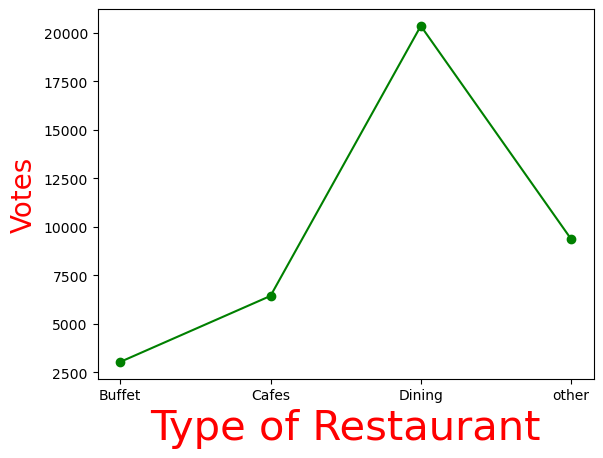

In [9]:
result = df.groupby('listed_in(type)')['votes'].sum()
plt.plot(result, color ="green",marker= "o")
plt.xlabel("Type of Restaurant", color = "Red",size =30) 
plt.ylabel("Votes",color = "Red",size=20)
plt.show()

# Conclusion: The majority of restaurants received ratings

# 3. What are the ratings that the majority of restaurants have received?

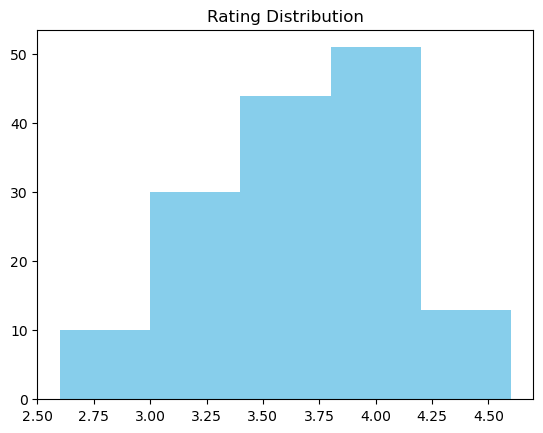

In [10]:
plt.hist(df['rate'],color="skyblue" ,bins=5)
plt.title('Rating Distribution')
plt.show()

# Conclusion: The majority of restaurants received ratings from 3.75 to 4

# The majority of couples prefer restaurants with an approximate cost of 300 rupees.

#  4. Zomato has observed that most couples order most of their food online. What is their  average spending on each order?

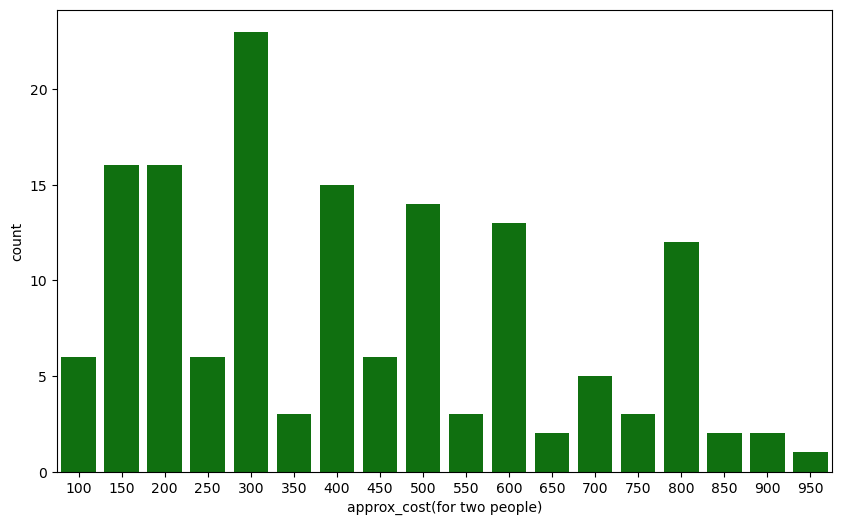

In [11]:
couple_data = df['approx_cost(for two people)']
plt.figure(figsize=(10,6))
sns.countplot(x=couple_data,color= "Green") 
plt.show()

# Whether online orders receive higher ratings than the offline orders.

# 5. Which mode (online or offline) has received the maximum rating?

C:\Users\LENOVO L480\AppData\Local\Temp\ipykernel_10444\1102227037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="online_order", y="rate", data=df, palette={"Yes": "orange", "No": "skyblue"})


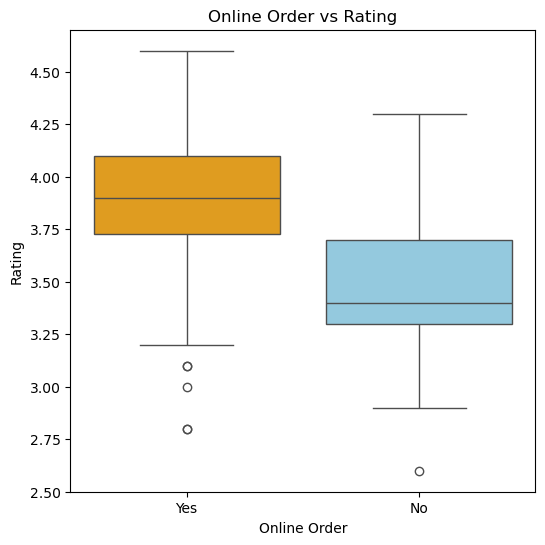

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y="rate", data=df, palette={"Yes": "orange", "No": "skyblue"})
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.title("Online Order vs Rating")
plt.show()


# Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

# 6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

C:\Users\LENOVO L480\AppData\Local\Temp\ipykernel_10444\1673413028.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(), inplace=True)


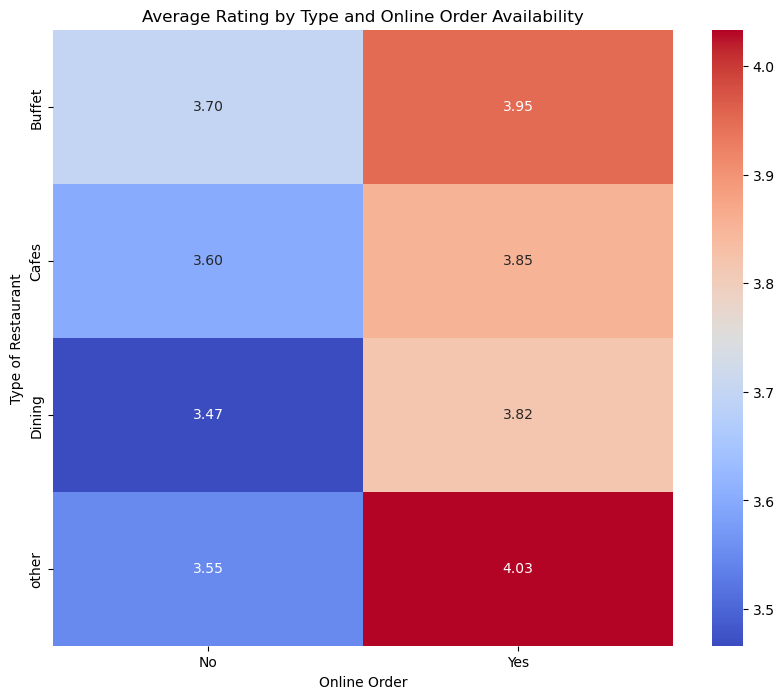

In [13]:
#Convert 'rate' to Numeric:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

#Handle Missing Values:
df['rate'].fillna(df['rate'].mean(), inplace=True)

#Drop Remaining Null Values:
df = df.dropna(subset=['rate']) 

#Create a Pivot Table and  Visualize with a Heatmap:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', values='rate', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Average Rating by Type and Online Order Availability")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.show()


# Conclusion: Dining restaurants primarily accept offline orders, Whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restrurants, But prefer online ordering in cafes.